In [2]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from math import log, exp

In [19]:
InputData = {
        "base_prop": {
            "calc_type": "optimal",
            "segment_count": 20,
            "border_type_x": "n",
            "border_type_y": "n",
            "border_type_z_up": "n",
            "border_type_z_down": "n",
        },
        "target": {
            "time_step": 0.01,
            "number_of_steps": 100,
            "cumulative_work_time": 2400,
            "target_values": {
                "q_liq": 50,
                "p_bhp": 150
            },
        },
        "unit": {
            "skin": 0,
            "h_eff": 10,
            "vertical_offset": 0.5,
            "perfres_ratio": 1,
            "wellbore_prop": {
                "wellbore_type": "vertical",
                "wellbore_r": 0.1,
                "afterinflow_model_name": "Stable",
                "afterinflow_coef": 0,
                "p_additional": "None",
                "redistribution_fase_time": "None",
                "horisontal_wellbore_length": 624,
                "horisontal_wellbore_perf_ratio": 1,
                "horisontal_perf_count": 5,
                "permiability": 100000000
            },
            "layer_prop": {
                "permiability": 10,
                "kvkh_ratio": 0.1,
                "compressability": 0.00012,
                "porosity": 0.2,
                "p_res_init": 250,
                "viscosity_oil": 1,
                "b_oil": 1.2,
                "res_model_type": "composite",
                "f_compressability": 0.0001,
                "f_porosity": 0.001,
                "lambda": 0.00001,
                "internal_r": 1,
                "kmu_in_out_ratio": 2,
                "kmuphict_in_out_ratio": 2,
                "grp_flag": True,
                "grp_prop": {
                    "hf": 60,
                    "kf": 1400,
                    "wellbore_wf": 4.31,
                    "res_wf": 4.31,
                    "grade": 1,
                    "skin_border": 0,
                    "skin_ch": 0,
                    "fracture_grow_t": 0,
                },
                "xe": 1000,
                "ye": 1000,
                "lc_ratio": 0.5,
                "wc_rectangle_ratio": 0.5
            }
        }
    }

In [20]:
response_target_rate = requests.post(r"http://192.168.3.247:40000/calc_flow_rate", json=InputData)
response_target_rate.text

'{"result":{"flow_rate_result":[4009.9923973432633,3864.964168775233,3725.516267229732,3591.294891756128,3461.9429247633175,3337.1029108304806,3216.4183522910057,3099.551966270474,2986.324904684565,2876.155827677393,2769.1433294121707,2664.8713527948357,2563.2397529062305,2464.0368073884706,2367.2212493102033,2272.628655861041,2180.185558868731,2089.893870322871,2001.7488579477397,1915.774906604739,1832.0304757775054,1750.6033265450321,1671.6035000768393,1595.1574552006364,1521.3980851492302,1450.4535285093607,1382.4353761531524,1317.4280006548918,1255.4800289157736,1196.5993712190595,1140.7514954103924,1087.8632124942096,1037.8247969990111,990.4880826919695,945.7082017793126,903.3400638813607,863.2106991413175,824.9311379082988,788.9858092540464,754.3841016664073,721.6243801085154,690.2778065725416,660.3465597509042,631.7139178808188,604.3029474473423,578.0509966513392,552.9070783516446,528.8353958638045,505.81450174002,483.8337237471068,462.8904863955459,442.98636500800944,424.122897

In [21]:
flow_rate = response_target_rate.json()["result"]["flow_rate_result"]
JD_q = response_target_rate.json()["result"]["JD"]
t = response_target_rate.json()["result"]["t"]

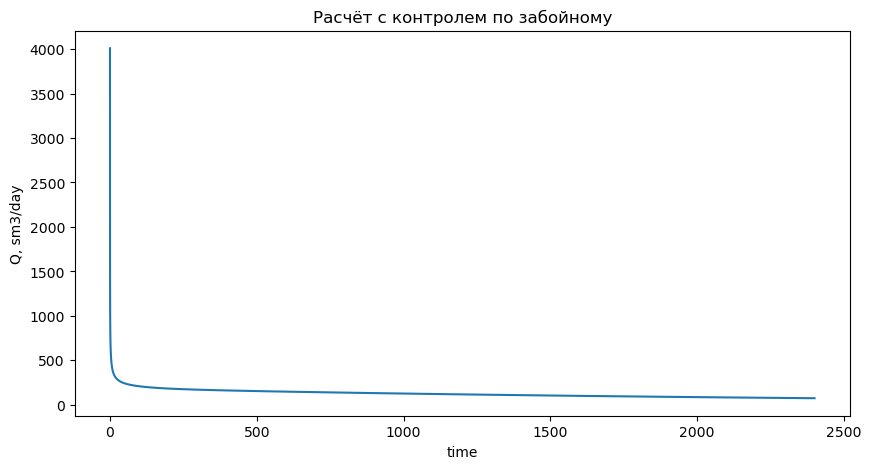

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(t, flow_rate)
plt.title("Расчёт с контролем по забойному")
plt.xlabel("time")
plt.ylabel("Q, sm3/day");

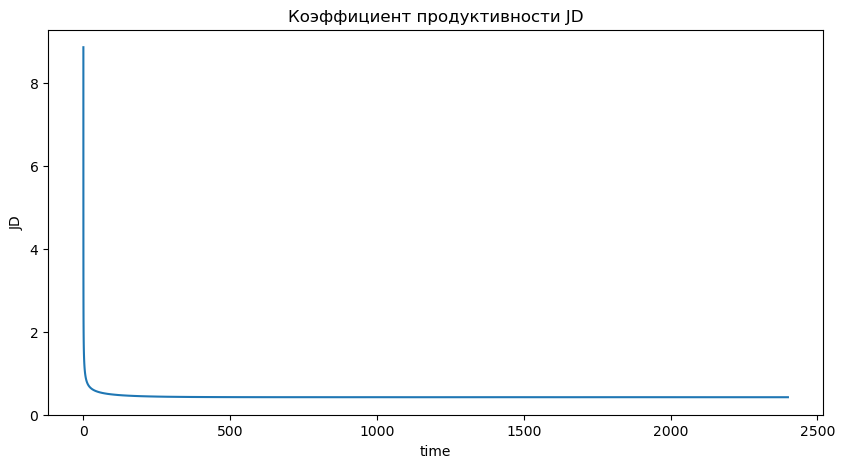

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(t, JD_q)
plt.title("Коэффициент продуктивности JD")
plt.xlabel("time")
plt.ylabel("JD");

In [25]:
response_pbhp = requests.post(r"http://192.168.3.247:40000/calc_p_bhp", json=InputData)
response_pbhp.text

'{"result":{"t":[0.01,0.01133301772727612,0.01284372908067548,0.014555820935562704,0.0164961376697789,0.018695102064319166,0.02118719231081655,0.024011482604969228,0.027212255802029846,0.03083969774035767,0.034950684119531075,0.039609672270707365,0.04488971180155239,0.050873589961930935,0.05765512968887398,0.06534066068324125,0.07405068658351069,0.08392177437678947,0.09510869567166219,0.10778685340650572,0.12215503204232418,0.13843851436116425,0.15689261373928443,0.17780667727859953,0.20150862256264326,0.22837007917014288,0.258812215561468,0.2933123426993725,0.3324113979440877,0.3767224265648983,0.42694019385224685,0.4838520785414217,0.5483504183489329,0.6214465011907734,0.7042864214548755,0.7981690499427965,0.9045663992364851,1.0251467038045414,1.161800576727555,1.3166706531613002,1.4921851853261243,1.691096115767977,1.9165222258526273,2.1719980360306512,2.461529224594429,2.7896554338536905,3.161521448485603,3.5829578620851015,4.06057249670938,4.601854008809726,5.21528930601773,5.9104

In [27]:
pbhp = response_pbhp.json()["result"]["p_wf_result"]
JD_p = response_pbhp.json()["result"]["JD"]
t = response_pbhp.json()["result"]["t"]

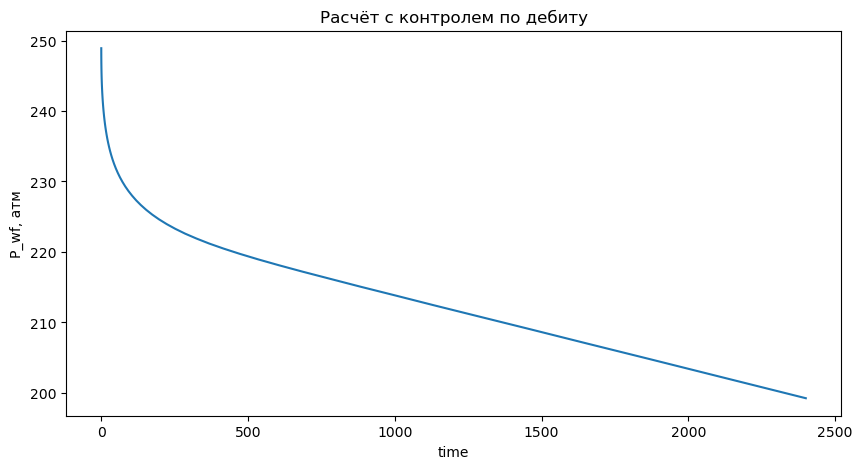

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(t, pbhp)
plt.title("Расчёт с контролем по дебиту")
plt.xlabel("time")
plt.ylabel("P_wf, атм");

Text(0, 0.5, 'JD')

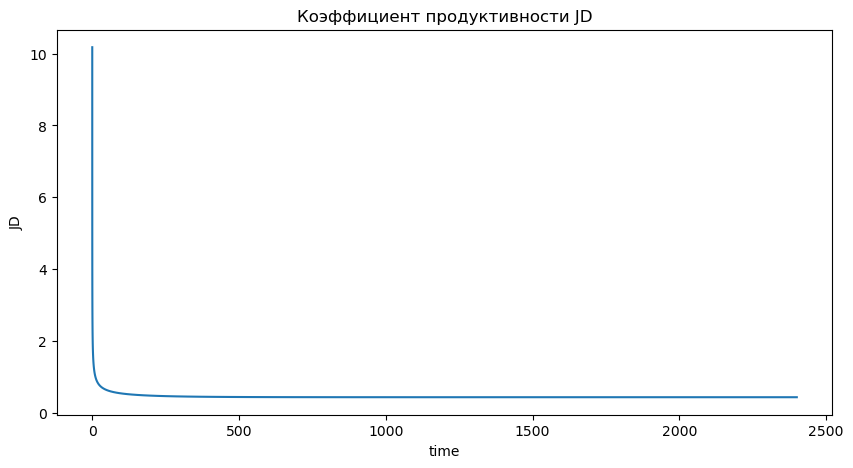

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(t, JD_p)
plt.title("Коэффициент продуктивности JD")
plt.xlabel("time")
plt.ylabel("JD")